![](http://www.upm.es/sfs/Rectorado/Gabinete%20del%20Rector/Logos/UPM/EscPolitecnica/EscUpmPolit_p.gif "UPM")

# Trabajo final SITC
## Análisis de sentimientos en Twitter

Departamento de Ingeniería de Sistemas Telemáticos. Universidad Politécnica de Madrid.

Realizado por:
- Juan Bermudo Mera
- Margarita Bolívar Jiménez
- Lourdes Fernández Nieto
- Ramón Pérez Hernández

© 2017

# Mapa del algoritmo SVC aplicado sobre el fichero de tweets

## Tabla de contenidos

* [Importación de datos necesarios](#1.-Importación-de-datos-necesarios)
	* [Importación de librerías](#Importación-de-librerías)
    * [Importación de tweets](#Importación-de-tweets)
* [Color](#2.-Color)
* [Mapa](#3.-Mapa)
    * [Retiro](#Retiro)
    * [Gran Vía](#Gran-Vía)
    * [Tráfico](#Tráfico)
    * [Aeropuerto](#Aeropuerto)
    * [Sitios Madrid](#Sitios-Madrid)
    * [Todos](#Todos)

## 1. Importación de datos necesarios

* ### Importación de librerías

In [2]:
# Importamos librerías. Algunas hay que instalarlas con pip install <nombre_paquete>

import numpy as np
import pandas as pd
import PIL
from PIL import ImageDraw, ImageFont
from IPython.display import Image
from scipy.misc import imread, imsave
from colour import Color

* ### Importación de tweets

In [4]:
# Se importan los tweets
tweets=pd.read_csv('ficheros/TweetsConPolaridadYTopic/tweetsSVC_polarity_bin.csv')
tweets = tweets[["content","Latitude","Longitude","polarity","Topic"]]
tweets

content   Latitude  \
0      Regalo para socios: 'Talento a la fuga', el li...  40.416000   
1      La recuperación del ‘ladrillo’ dispara el 144,...  40.416000   
2      TELEVISIÓN SERIES - Cuenta atrás para conocer ...  40.416000   
3      Nuestra taza de hoy es un homenaje a uno de lo...  40.416000   
4                  @MCadepe nos vemos el 19 de mayooo!!!  40.416000   
5                           Prince "Cream"  vía @YouTube  40.416000   
6         'nicholson' es ahora una tendencia en #Madrid   40.416700   
7      Sobre el acuerdo de París sobre el cambio clim...  40.416000   
8      Por que tengo amigos tan mal pensados . Porque...  40.416000   
9      Que #lujo es trabajar contigo!!.. @giajons Te ...  40.416000   
10     eres el mejor rey Felipe pero k hace ahí la vi...  40.416000   
11     @ForreMarti @Cataloniawatch va a haber un enfr...  40.416000   
12     @Ensayoss @ciudadfutura Y el del negro de la A...  40.327180   
13     ¿Deberían los Jaguars subir al tercer puesto d...  40.416000   
14                           @orishara igual luego puedo  40.416000   
15     Horizon: Zero Dawn podría haberse retrasado al...  40.416000   
16                         Lo que hacen las amenazas...   40.416000   
17     Salad Love, pasión por las ensaladas: El prime...  40.416000   
18     Cofinancio el proyecto Alimentando Conciencias...  40.416000   
19     @Pablo_Iglesias_ @FacuDiazT  desencanto total,...  40.416000   
20     No sabrás decidirte! #felizviernes #planes #Ar...  40.416000   
21     Cuenta atrás del Buff Epic Trail #Aigüestortes...  40.416500   
22     Soy más ilusa que una niña de dos años. Tengo ...  40.416000   
23               Alguien me dice qué son las sollapas???  40.380159   
24     Buscamos piso en MADRID para el nuevo proyecto...  40.416000   
25     @DebatAlRojoVivo @VerstryngeJorge de verdad, a...  40.416000   
26     ¡Tremendo dato! Hay que luchar contra los #Del...  40.416000   
27                    En cuanto como un poco ya me lleno  40.322340   
28     Al mal tiempo, buena cara!! Saca tu mejor #son...  40.416000   
29                      @AinhoaGarrido29 fisiología no?   40.416000   
...                                                  ...        ...   
26333  Así recibió el calderón al Barcelona #nuncadej...  40.466700   
26334  Flying @ Aeropuerto Madrid - Barajas. Adolfo S...  40.491296   
26335            Turistas  @ Parque del Retiro - Madrid   40.416690   
26336  Estoy de hospitales..... Hasta los web @ Hospi...  40.348754   
26337  Me encanta oler flores en la oscuridad, es cua...  40.422935   
26338  #Juernes de #Baileactivo en #FitnessPlanetocio...  40.636773   
26339  Propuestas para Toledo #urbanismo #workshop #t...  39.871657   
26340  Con la people!! #selfiesconflash #Uue #Enis @ ...  40.479365   
26341  Apoyando a nuestro real hasta el final, VAMOS ...  40.452817   
26342  Evento marketero #hemesic de @ESICMadrid @icem...  40.470808   
26343  Este sábado, II Encuentro #Torrejón Literario ...  40.450611   
26344  #RETENCIÓN nivel AMARILLO en AUTOPISTA / AUTOV...  40.308346   
26345  13/04/16 #paseandoanaya #iphone5 #primavera #s...  40.446828   
26346  "Ritmo bueno para gozar" que es jueves .\n\nPr...  40.466420   
26347  13/04/16 #paseandoanaya #iphone5 #primavera #s...  40.446828   
26348  13/04/16 #paseandoanaya #iphone5 #primavera #s...  40.446828   
26349  ESO: alumnos de 4° participando en una charla ...  40.379290   
26350  Hoy amaneció tan lindo #Madrid que merece desa...  40.430636   
26351  El destino no nos tiene que importar  @ La Ped...  40.771111   
26352  Ayer entre bellezones para apoyar el desfile d...  40.409840   
26353  Hoy hace un día tan ESTUPENDO que no apetece i...  40.488856   
26354  Buenos días!!!\n#bondia #diaslluviosos  #like ...  40.270572   
26355  Pues empezamos la semana\n#empezandolasemana #...  40.270572   
26356  Buenos días!!! \n#quebuendia #comenzandolatard...  40.266700   
26357  Entre broma y broma las indirectas se asoman\n...  40.266700   
26

## 2. Color

In [3]:
base_gradient = imread('ficheros/Mapas/gradient-1.2.png')
base_gradient.shape

(256, 43, 4)

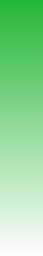

In [4]:
# Elegimos color y lo guardamos para así poder usarlo luego
hsva_min = Color()
hsva_min.hex_l = '#24b736'

hsva_max = Color()
hsva_max.hex_l = '#24b736'

color_gradient = list(hsva_max.range_to(hsva_min,base_gradient.shape[0]))
alpha = np.arange(0,256)[::-1]

gradient = []
for i, color_point in enumerate(color_gradient):
    rgb = list(color_point.get_rgb())
    rgb = [int(e * 255) for e in rgb]
    rgb.append(alpha[i])
    gradient.append([rgb])
color_gradient = np.array(gradient)

width = 43
from copy import deepcopy

color_gradient_row = deepcopy(color_gradient)

for col in range(width-1):
    color_gradient = np.hstack((color_gradient, color_gradient_row))

imsave('ficheros/Mapas/green.png', color_gradient)
Image('ficheros/Mapas/green.png')

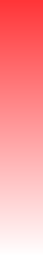

In [5]:
# Elegimos color y lo guardamos para así poder usarlo luego
hsva_min = Color()
hsva_min.hex_l = '#ff3639'

hsva_max = Color()
hsva_max.hex_l = '#ff3639'

color_gradient = list(hsva_max.range_to(hsva_min,base_gradient.shape[0]))
alpha = np.arange(0,256)[::-1]

gradient = []
for i, color_point in enumerate(color_gradient):
    rgb = list(color_point.get_rgb())
    rgb = [int(e * 255) for e in rgb]
    rgb.append(alpha[i])
    gradient.append([rgb])
color_gradient = np.array(gradient)

width = 43
from copy import deepcopy

color_gradient_row = deepcopy(color_gradient)

for col in range(width-1):
    color_gradient = np.hstack((color_gradient, color_gradient_row))

imsave('ficheros/Mapas/red.png', color_gradient)
Image('ficheros/Mapas/red.png')

## 3. Mapa

* ### Retiro

In [6]:
with open('ficheros/Mapas/tweets_with_polarity_negative_svc_retiro','w') as file:
    file.write(tweets[['Latitude','Longitude']][(tweets.polarity==0)&(tweets.Topic=='retiro')].to_string(header=False, index=False))
with open('ficheros/Mapas/tweets_with_polarity_positive_svc_retiro','w') as file:
    file.write(tweets[['Latitude','Longitude']][(tweets.polarity==1)&(tweets.Topic=='retiro')].to_string(header=False, index=False))

Retrieving 9 tiles...
... done.


      63 ms  // reading points from ficheros/Mapas/tweets_with_polarity_negative_svc_retiro
      64 ms  // read 22 points
      64 ms  // scale: 0.000146 meters/pixel (763549741.511111 pixels/degree)
      64 ms  // Choosing OSM zoom level 13
      64 ms  // scale: 19.109257 meters/pixel (5825.422222 pixels/degree)
     122 ms  // input extent: 40.37773131323053,-3.7107596137695307,40.426466765766804,-3.624309386230469
     123 ms  // output extent: -257891.24955165823,-21616.741515377777,-257518.43381976406,-21113.132438755558
     123 ms  // creating an appending matrix
     123 ms  // processing data
     130 ms  // combining coincident points
     132 ms  // saving image (494 x 364)
     196 ms  // end


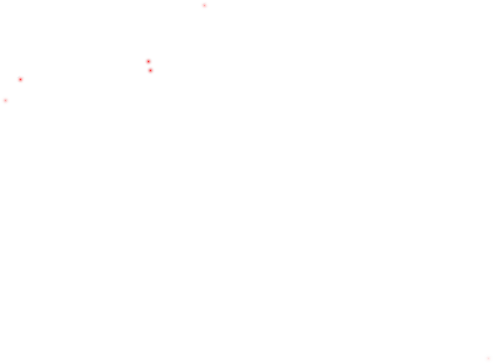

In [7]:
# Capa de tweets negativos
!python ficheros/Mapas/heatmap.py \
-p ficheros/Mapas/tweets_with_polarity_negative_svc_retiro \
-W 800 \
-o ficheros/Mapas/madrid_tweets_polarity_negative_svc_retiro.png \
-G ficheros/Mapas/red.png \
--decay 0.5  -v -r 5 \
--osm \
--osm_base=http://a.basemaps.cartocdn.com/light_all/ --layer  
    

Image('ficheros/Mapas/madrid_tweets_polarity_negative_svc_retiro.png')

Retrieving 10 tiles...
... done.


      62 ms  // reading points from ficheros/Mapas/tweets_with_polarity_positive_svc_retiro
      63 ms  // read 103 points
      64 ms  // scale: 0.000146 meters/pixel (763549741.511111 pixels/degree)
      64 ms  // Choosing OSM zoom level 14
      64 ms  // scale: 9.554629 meters/pixel (11650.844444 pixels/degree)
     120 ms  // input extent: 40.34796986470778,-3.7114983068847662,40.425813386056944,-3.674001693115234
     121 ms  // output extent: -515772.49910331675,-43242.08942933334,-514581.7955148102,-42805.22221511111
     121 ms  // creating an appending matrix
     121 ms  // processing data
     152 ms  // combining coincident points
     155 ms  // saving image (428 x 1182)
     276 ms  // end


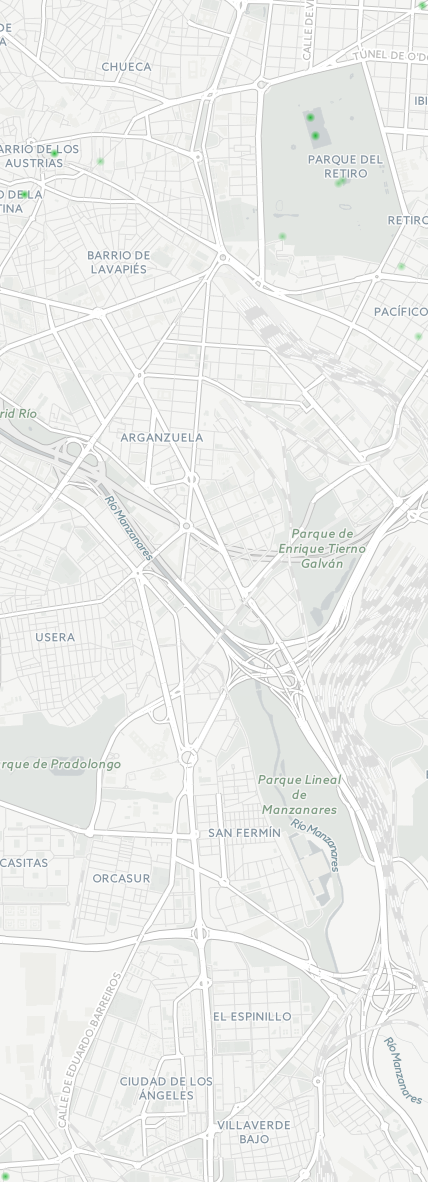

In [8]:
# Capa de tweets positivos
!python ficheros/Mapas/heatmap.py \
-p ficheros/Mapas/tweets_with_polarity_positive_svc_retiro \
-W 800 \
-o ficheros/Mapas/madrid_tweets_polarity_layered_svc_retiro.png \
-G ficheros/Mapas/green.png \
--osm \
--osm_base=http://a.basemaps.cartocdn.com/light_all/ \
--decay 0.5  -v -r 5 

Image('ficheros/Mapas/madrid_tweets_polarity_layered_svc_retiro.png')

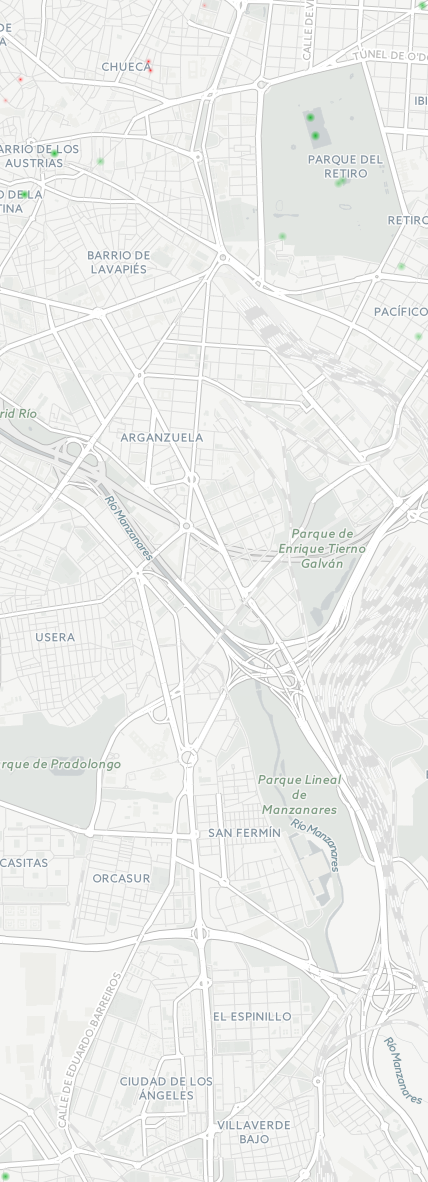

In [9]:
background = PIL.Image.open('ficheros/Mapas/madrid_tweets_polarity_layered_svc_retiro.png')
foreground = PIL.Image.open('ficheros/Mapas/madrid_tweets_polarity_negative_svc_retiro.png')

background.paste(foreground, (0, 0), foreground)

draw = ImageDraw.Draw(background)

background.save('ficheros/Mapas/madrid_tweets_polarity_svc_retiro.png')
background

* ### Gran Vía

In [10]:
with open('ficheros/Mapas/tweets_with_polarity_negative_svc_gran-via','w') as file:
    file.write(tweets[['Latitude','Longitude']][(tweets.polarity==0)&(tweets.Topic=='gran-via')].to_string(header=False, index=False))
with open('ficheros/Mapas/tweets_with_polarity_positive_svc_gran-via','w') as file:
    file.write(tweets[['Latitude','Longitude']][(tweets.polarity==1)&(tweets.Topic=='gran-via')].to_string(header=False, index=False))

Retrieving 30 tiles...
... done.


      76 ms  // reading points from ficheros/Mapas/tweets_with_polarity_negative_svc_gran-via
      76 ms  // read 8 points
      76 ms  // scale: 0.000146 meters/pixel (763549741.511111 pixels/degree)
      76 ms  // Choosing OSM zoom level 15
      76 ms  // scale: 4.777314 meters/pixel (23301.688889 pixels/degree)
     165 ms  // input extent: 40.35296095576558,-3.7094031534423824,40.42261370777567,-3.6819888465576174
     165 ms  // output extent: -1031447.0586290765,-86435.35824497778,-1029316.1971220034,-85796.55859484445
     165 ms  // creating an appending matrix
     165 ms  // processing data
     168 ms  // combining coincident points
     169 ms  // saving image (630 x 2122)
     543 ms  // end


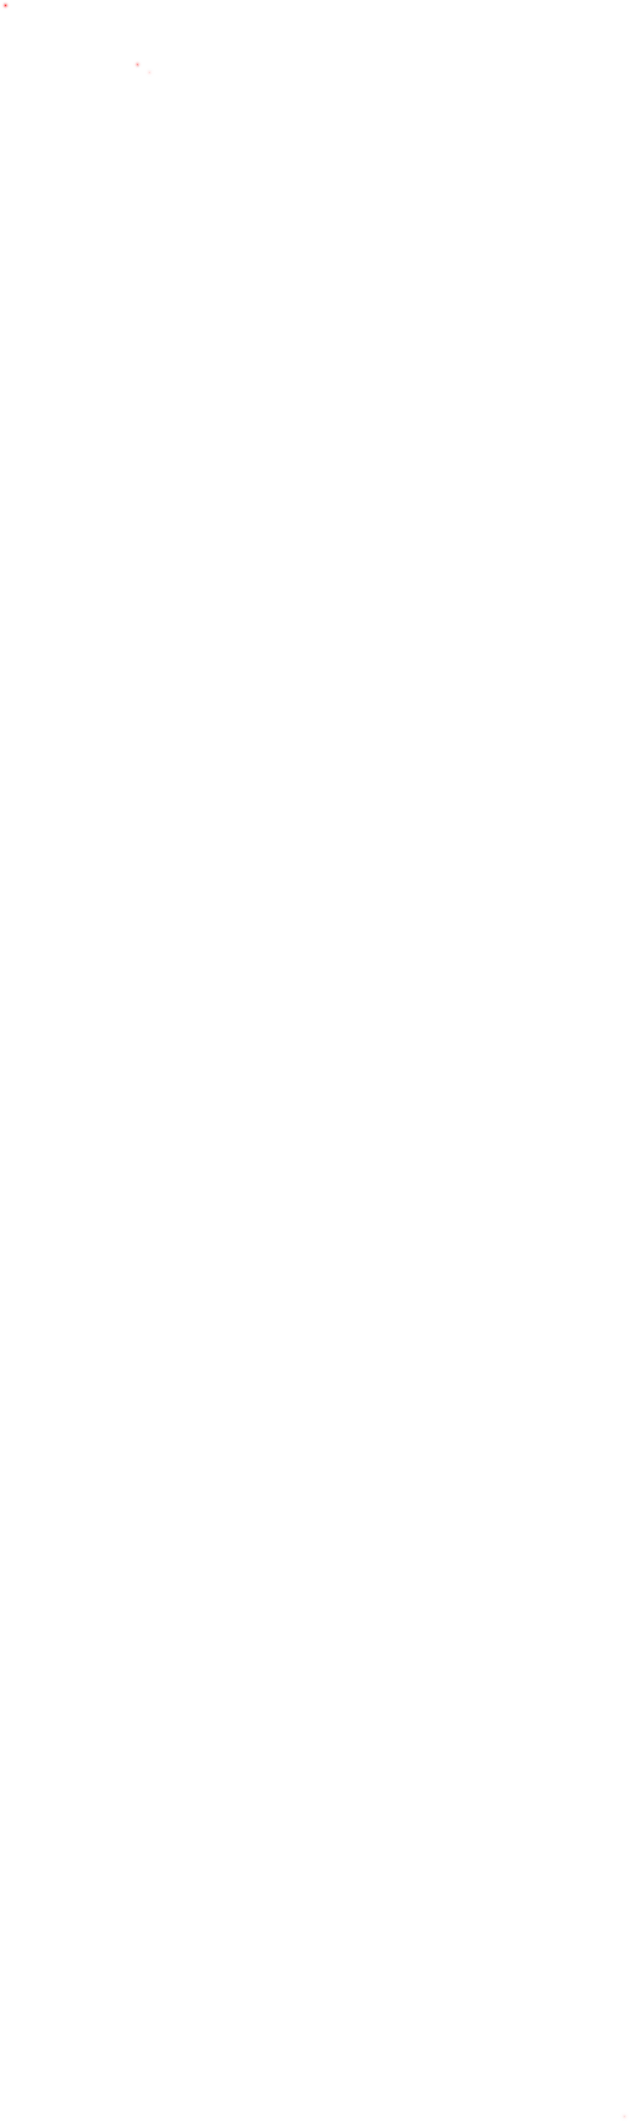

In [11]:
# Capa de tweets negativos
!python ficheros/Mapas/heatmap.py \
-p ficheros/Mapas/tweets_with_polarity_negative_svc_gran-via \
-W 800 \
-o ficheros/Mapas/madrid_tweets_polarity_negative_svc_gran-via.png \
-G ficheros/Mapas/red.png \
--decay 0.5  -v -r 5 \
--osm \
--osm_base=http://a.basemaps.cartocdn.com/light_all/ --layer  
    

Image('ficheros/Mapas/madrid_tweets_polarity_negative_svc_gran-via.png')

Retrieving 15 tiles...
... done.


      63 ms  // reading points from ficheros/Mapas/tweets_with_polarity_positive_svc_gran-via
      64 ms  // read 107 points
      65 ms  // scale: 0.000146 meters/pixel (763549741.511111 pixels/degree)
      65 ms  // Choosing OSM zoom level 11
      65 ms  // scale: 76.437028 meters/pixel (1456.355556 pixels/degree)
     122 ms  // input extent: 39.9947397876482,-4.006866455078125,40.474734462505864,-3.6343285449218756
     122 ms  // output extent: -64565.18835217031,-5835.422222222222,-63649.49054624417,-5292.874567111112
     123 ms  // creating an appending matrix
     123 ms  // processing data
     154 ms  // combining coincident points
     159 ms  // saving image (534 x 907)
     224 ms  // end


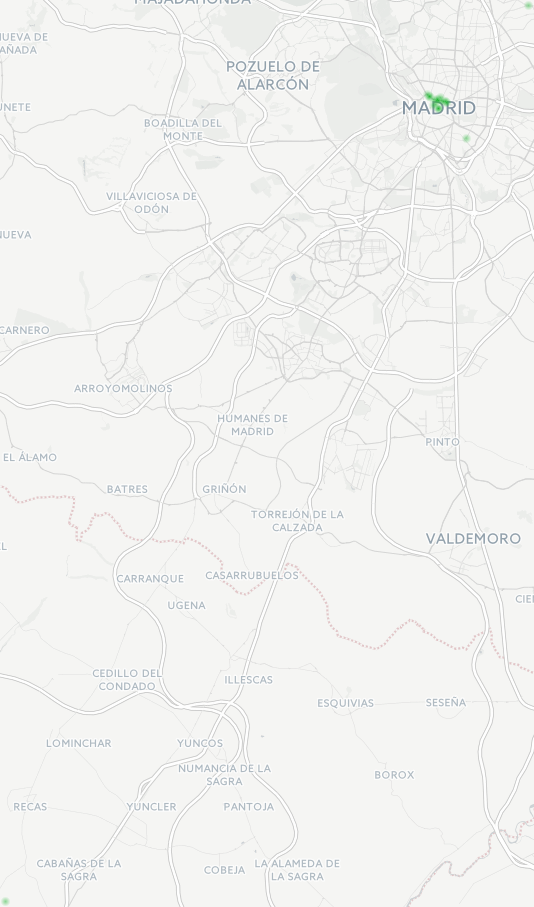

In [12]:
# Capa de tweets positivos
!python ficheros/Mapas/heatmap.py \
-p ficheros/Mapas/tweets_with_polarity_positive_svc_gran-via \
-W 800 \
-o ficheros/Mapas/madrid_tweets_polarity_layered_svc_gran-via.png \
-G ficheros/Mapas/green.png \
--osm \
--osm_base=http://a.basemaps.cartocdn.com/light_all/ \
--decay 0.5  -v -r 5 

Image('ficheros/Mapas/madrid_tweets_polarity_layered_svc_gran-via.png')

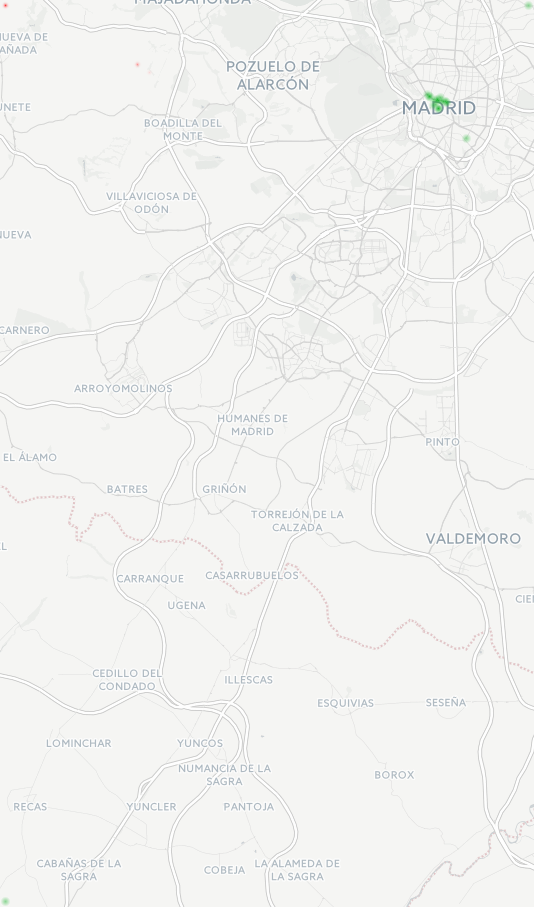

In [13]:
background = PIL.Image.open('ficheros/Mapas/madrid_tweets_polarity_layered_svc_gran-via.png')
foreground = PIL.Image.open('ficheros/Mapas/madrid_tweets_polarity_negative_svc_gran-via.png')

background.paste(foreground, (0, 0), foreground)

draw = ImageDraw.Draw(background)

background.save('ficheros/Mapas/madrid_tweets_polarity_svc_gran-via.png')
background

* ### Tráfico

In [14]:
with open('ficheros/Mapas/tweets_with_polarity_negative_svc_trafico','w') as file:
    file.write(tweets[['Latitude','Longitude']][(tweets.polarity==0)&(tweets.Topic=='trafico')].to_string(header=False, index=False))
with open('ficheros/Mapas/tweets_with_polarity_positive_svc_trafico','w') as file:
    file.write(tweets[['Latitude','Longitude']][(tweets.polarity==1)&(tweets.Topic=='trafico')].to_string(header=False, index=False))

In [15]:
# Capa de tweets negativos
!python ficheros/Mapas/heatmap.py \
-p ficheros/Mapas/tweets_with_polarity_negative_svc_trafico \
-W 800 \
-o ficheros/Mapas/madrid_tweets_polarity_negative_svc_trafico.png \
-G ficheros/Mapas/red.png \
--decay 0.5  -v -r 5 \
--osm \
--osm_base=http://a.basemaps.cartocdn.com/light_all/ --layer  
    
Image('ficheros/Mapas/madrid_tweets_polarity_negative_svc_trafico.png')

      70 ms  // reading points from ficheros/Mapas/tweets_with_polarity_negative_svc_trafico
Traceback (most recent call last):
  File "ficheros/Mapas/heatmap.py", line 1179, in <module>
    main()
  File "ficheros/Mapas/heatmap.py", line 1159, in main
    config.fill_missing()
  File "ficheros/Mapas/heatmap.py", line 1107, in fill_missing
    self.shapes = list(self.shapes)
  File "ficheros/Mapas/heatmap.py", line 788, in shapes_from_file
    values = [float(x) for x in line.split()]
  File "ficheros/Mapas/heatmap.py", line 788, in <listcomp>
    values = [float(x) for x in line.split()]
ValueError: could not convert string to float: 'Empty'


In [6]:
# Nos sale que está vacío, así que lo comprobamos
tweetstraficonegativos=tweets[(tweets.Topic=='trafico')&(tweets.polarity==0)]
tweetstraficonegativos

Empty DataFrame
Columns: [content, Latitude, Longitude, polarity, Topic]
Index: []

Retrieving 6 tiles...
... done.


      66 ms  // reading points from ficheros/Mapas/tweets_with_polarity_positive_svc_trafico
      69 ms  // read 599 points
      74 ms  // scale: 0.000146 meters/pixel (763549741.511111 pixels/degree)
      74 ms  // Choosing OSM zoom level 9
      74 ms  // scale: 305.748113 meters/pixel (364.088889 pixels/degree)
     125 ms  // input extent: 39.99756245155575,-4.5588128203125,40.744746042882326,-3.0388861796875006
     125 ms  // output extent: -16270.79331397808,-1659.8130944000002,-15913.714128758294,-1106.4246926222224
     125 ms  // creating an appending matrix
     125 ms  // processing data
     304 ms  // combining coincident points
     330 ms  // saving image (544 x 348)
     402 ms  // end


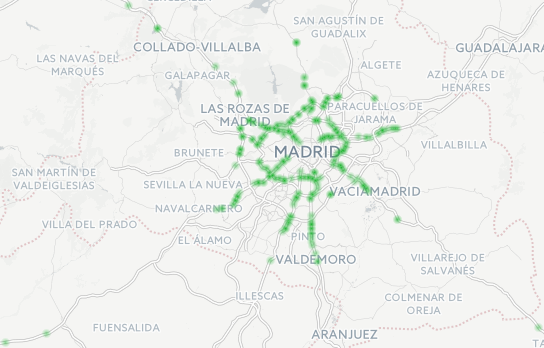

In [17]:
# Capa de tweets positivos
!python ficheros/Mapas/heatmap.py \
-p ficheros/Mapas/tweets_with_polarity_positive_svc_trafico \
-W 800 \
-o ficheros/Mapas/madrid_tweets_polarity_layered_svc_trafico.png \
-G ficheros/Mapas/green.png \
--osm \
--osm_base=http://a.basemaps.cartocdn.com/light_all/ \
--decay 0.5  -v -r 5 

Image('ficheros/Mapas/madrid_tweets_polarity_layered_svc_trafico.png')

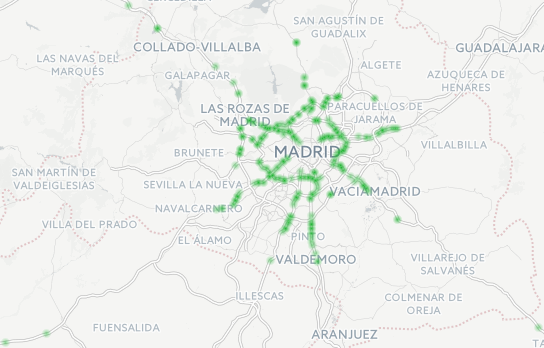

In [5]:
background = PIL.Image.open('ficheros/Mapas/madrid_tweets_polarity_layered_svc_trafico.png')
#foreground = PIL.Image.open('ficheros/Mapas/madrid_tweets_polarity_layered_svc_trafico.png')

#background.paste(foreground, (0, 0), foreground)

draw = ImageDraw.Draw(background)

background.save('ficheros/Mapas/madrid_tweets_polarity_svc_trafico.png')
background

* ### Aeropuerto

In [19]:
with open('ficheros/Mapas/tweets_with_polarity_negative_svc_aeropuerto','w') as file:
    file.write(tweets[['Latitude','Longitude']][(tweets.polarity==0)&(tweets.Topic=='aeropuerto')].to_string(header=False, index=False))
with open('ficheros/Mapas/tweets_with_polarity_positive_svc_aeropuerto','w') as file:
    file.write(tweets[['Latitude','Longitude']][(tweets.polarity==1)&(tweets.Topic=='aeropuerto')].to_string(header=False, index=False))

In [20]:
# Capa de tweets negativos
!python ficheros/Mapas/heatmap.py \
-p ficheros/Mapas/tweets_with_polarity_negative_svc_aeropuerto \
-W 800 \
-o ficheros/Mapas/madrid_tweets_polarity_negative_svc_aeropuerto.png \
-G ficheros/Mapas/red.png \
--decay 0.5  -v -r 5 \
--osm \
--osm_base=http://a.basemaps.cartocdn.com/light_all/ --layer  \
-e 40.4,-3.7,40.6,-3.5 \
--zoom 12
    
Image('ficheros/Mapas/madrid_tweets_polarity_negative_svc_aeropuerto.png')

Retrieving 16 tiles...
... done.


      59 ms  // scale: 38.218514 meters/pixel (2912.711111 pixels/degree)
     120 ms  // input extent: 40.39738541494165,-3.7034332275390622,40.60260670033642,-3.4965667724609375
     120 ms  // output extent: -129620.4701588054,-10787.031111111111,-128834.37549909764,-10184.488888888889
     121 ms  // creating an appending matrix
     121 ms  // processing data
     121 ms  // reading points from ficheros/Mapas/tweets_with_polarity_negative_svc_aeropuerto
     125 ms  // read 15 points
     125 ms  // combining coincident points
     126 ms  // saving image (594 x 777)
     230 ms  // end


Retrieving 16 tiles...
... done.


      66 ms  // scale: 38.218514 meters/pixel (2912.711111 pixels/degree)
     131 ms  // input extent: 40.39738541494165,-3.7034332275390622,40.60260670033642,-3.4965667724609375
     131 ms  // output extent: -129620.4701588054,-10787.031111111111,-128834.37549909764,-10184.488888888889
     131 ms  // creating an appending matrix
     131 ms  // processing data
     131 ms  // reading points from ficheros/Mapas/tweets_with_polarity_positive_svc_aeropuerto
     165 ms  // read 97 points
     165 ms  // combining coincident points
     167 ms  // saving image (594 x 777)
     263 ms  // end


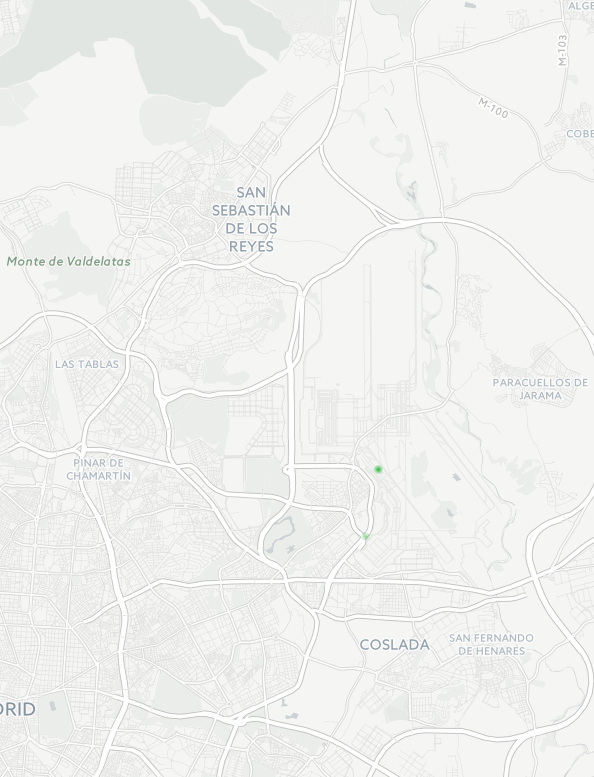

In [21]:
# Capa de tweets positivos
!python ficheros/Mapas/heatmap.py \
-p ficheros/Mapas/tweets_with_polarity_positive_svc_aeropuerto \
-W 800 \
-o ficheros/Mapas/madrid_tweets_polarity_layered_svc_aeropuerto.png \
-G ficheros/Mapas/green.png \
--osm \
--osm_base=http://a.basemaps.cartocdn.com/light_all/ \
--decay 0.5  -v -r 5 \
-e 40.4,-3.7,40.6,-3.5 \
--zoom 12

Image('ficheros/Mapas/madrid_tweets_polarity_layered_svc_aeropuerto.png')

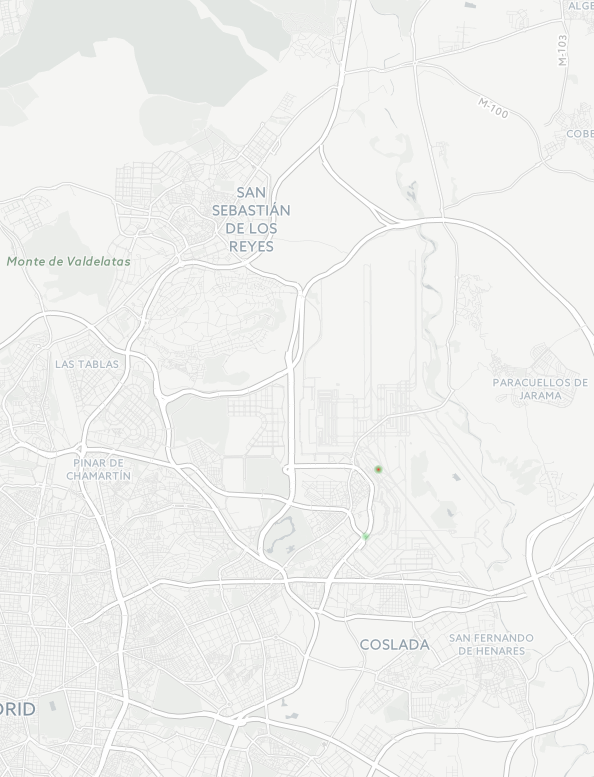

In [22]:
background = PIL.Image.open('ficheros/Mapas/madrid_tweets_polarity_layered_svc_aeropuerto.png')
foreground = PIL.Image.open('ficheros/Mapas/madrid_tweets_polarity_negative_svc_aeropuerto.png')

background.paste(foreground, (0, 0), foreground)

draw = ImageDraw.Draw(background)

background.save('ficheros/Mapas/madrid_tweets_polarity_svc_aeropuerto.png')
background

* ### Sitios Madrid

In [23]:
with open('ficheros/Mapas/tweets_with_polarity_negative_svc_sitios-madrid','w') as file:
    file.write(tweets[['Latitude','Longitude']][(tweets.polarity==0)&(tweets.Topic=='sitios-madrid')].to_string(header=False, index=False))
with open('ficheros/Mapas/tweets_with_polarity_positive_svc_sitios-madrid','w') as file:
    file.write(tweets[['Latitude','Longitude']][(tweets.polarity==1)&(tweets.Topic=='sitios-madrid')].to_string(header=False, index=False))

Retrieving 9 tiles...
... done.


      85 ms  // reading points from ficheros/Mapas/tweets_with_polarity_negative_svc_sitios-madrid
      86 ms  // read 95 points
      87 ms  // scale: 0.000146 meters/pixel (763549741.511111 pixels/degree)
      87 ms  // Choosing OSM zoom level 11
      87 ms  // scale: 76.437028 meters/pixel (1456.355556 pixels/degree)
     147 ms  // input extent: 40.27806167499557,-4.006866455078125,40.5546082440508,-3.559803544921875
     147 ms  // output extent: -64718.19885363798,-5835.422222222222,-64189.20530331475,-5184.339669333333
     147 ms  // creating an appending matrix
     147 ms  // processing data
     176 ms  // combining coincident points
     182 ms  // saving image (642 x 520)
     260 ms  // end


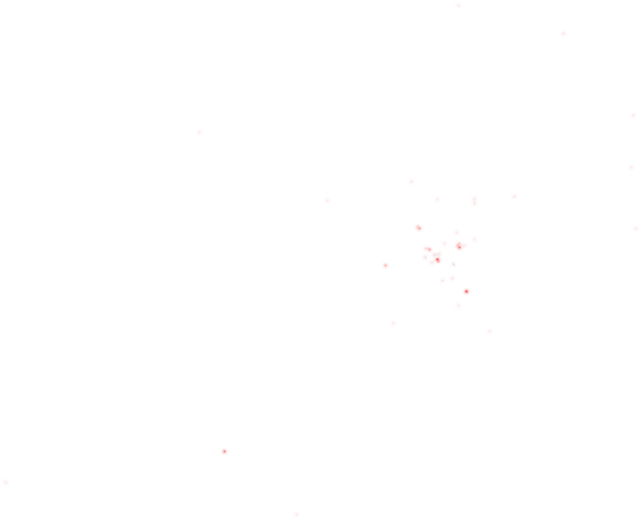

In [24]:
# Capa de tweets negativos
!python ficheros/Mapas/heatmap.py \
-p ficheros/Mapas/tweets_with_polarity_negative_svc_sitios-madrid \
-W 800 \
-o ficheros/Mapas/madrid_tweets_polarity_negative_svc_sitios-madrid.png \
-G ficheros/Mapas/red.png \
--decay 0.5  -v -r 5 \
--osm \
--osm_base=http://a.basemaps.cartocdn.com/light_all/ --layer  
    
Image('ficheros/Mapas/madrid_tweets_polarity_negative_svc_sitios-madrid.png')

Retrieving 24 tiles...
... done.


      82 ms  // reading points from ficheros/Mapas/tweets_with_polarity_positive_svc_sitios-madrid
      87 ms  // read 988 points
      96 ms  // scale: 0.000146 meters/pixel (763549741.511111 pixels/degree)
      96 ms  // Choosing OSM zoom level 10
      96 ms  // scale: 152.874057 meters/pixel (728.177778 pixels/degree)
     169 ms  // input extent: 39.856158662250294,-4.16373291015625,41.14160487568694,-3.05293708984375
     169 ms  // output extent: -32924.1661650785,-3031.937777777778,-31693.157888250007,-2223.0809457777777
     169 ms  // creating an appending matrix
     169 ms  // processing data
     457 ms  // combining coincident points
     500 ms  // saving image (799 x 1222)
     657 ms  // end


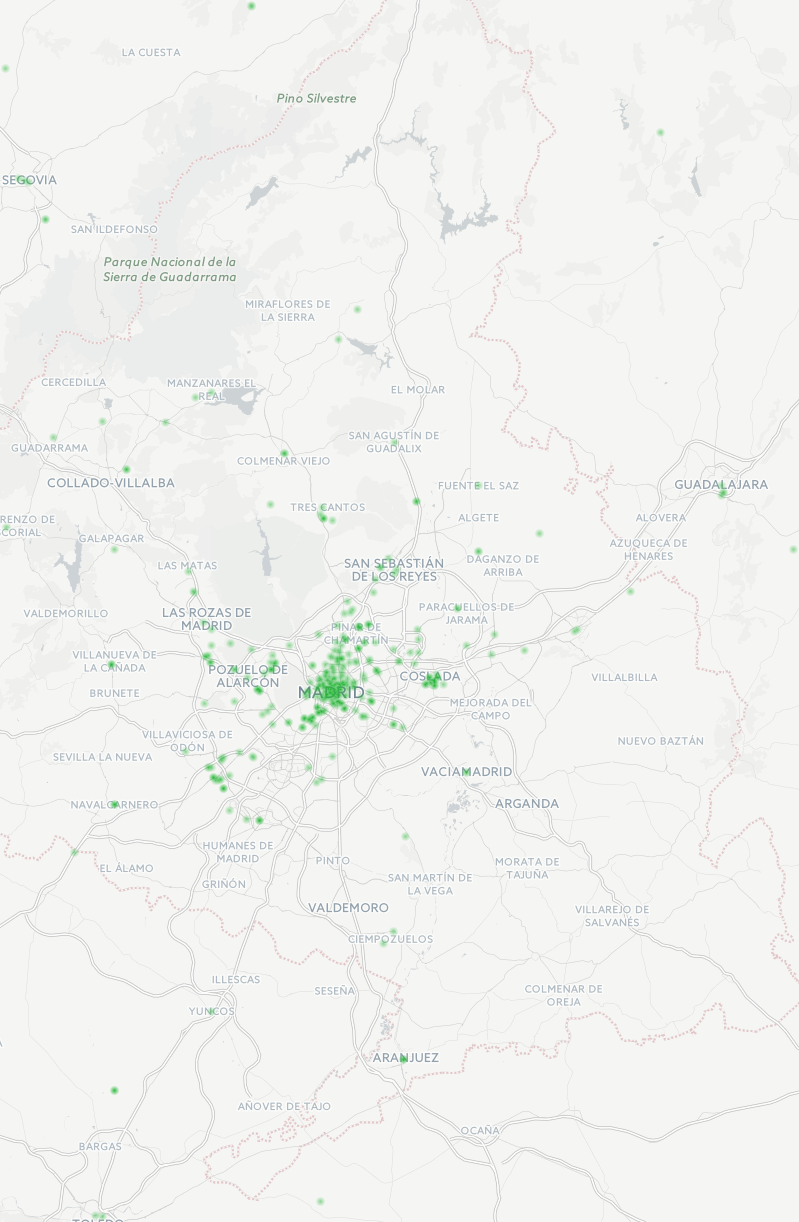

In [25]:
# Capa de tweets positivos
!python ficheros/Mapas/heatmap.py \
-p ficheros/Mapas/tweets_with_polarity_positive_svc_sitios-madrid \
-W 800 \
-o ficheros/Mapas/madrid_tweets_polarity_layered_svc_sitios-madrid.png \
-G ficheros/Mapas/green.png \
--osm \
--osm_base=http://a.basemaps.cartocdn.com/light_all/ \
--decay 0.5  -v -r 5 

Image('ficheros/Mapas/madrid_tweets_polarity_layered_svc_sitios-madrid.png')

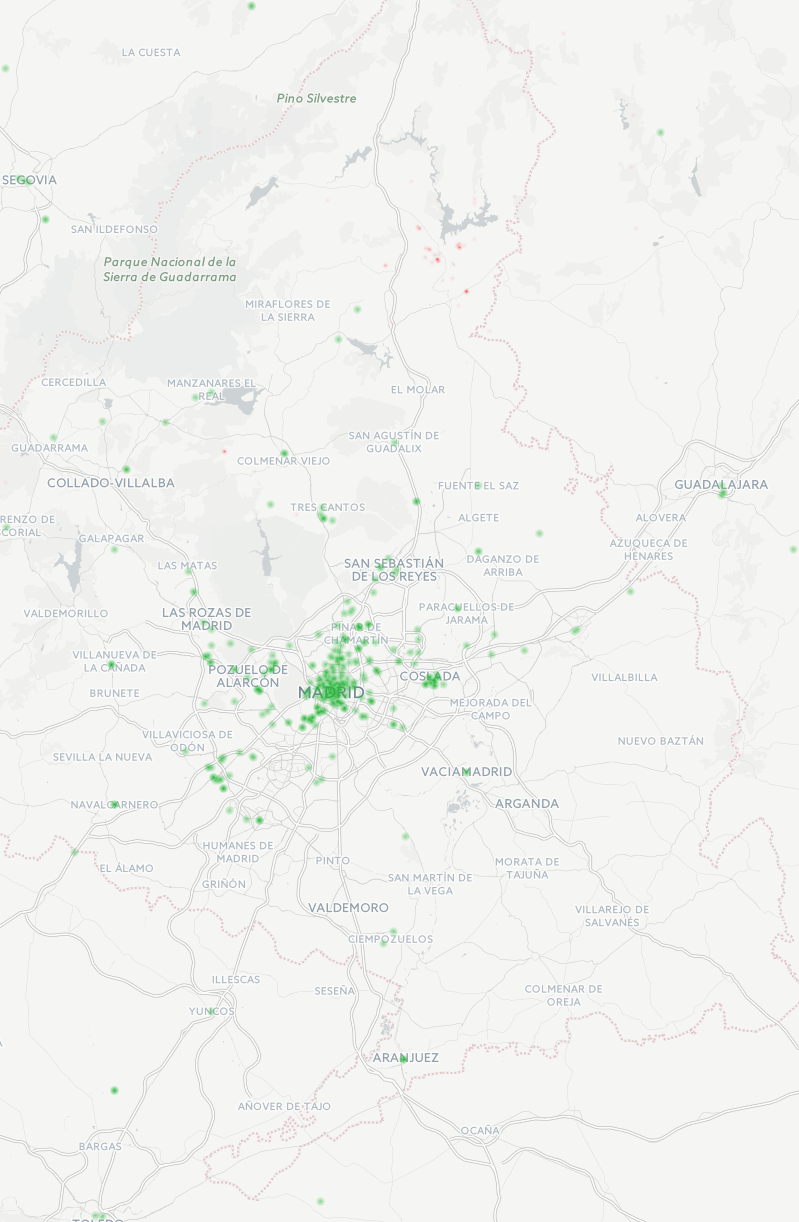

In [26]:
background = PIL.Image.open('ficheros/Mapas/madrid_tweets_polarity_layered_svc_sitios-madrid.png')
foreground = PIL.Image.open('ficheros/Mapas/madrid_tweets_polarity_negative_svc_sitios-madrid.png')

background.paste(foreground, (0, 0), foreground)

draw = ImageDraw.Draw(background)

background.save('ficheros/Mapas/madrid_tweets_polarity_svc_sitios-madrid.png')
background

* ### Todos

In [27]:
with open('ficheros/Mapas/tweets_with_polarity_negative_svc','w') as file:
    file.write(tweets[['Latitude','Longitude']][(tweets.polarity==0)].to_string(header=False, index=False))
with open('ficheros/Mapas/tweets_with_polarity_positive_svc','w') as file:
    file.write(tweets[['Latitude','Longitude']][(tweets.polarity==1)].to_string(header=False, index=False))

Retrieving 12 tiles...
... done.


      67 ms  // scale: 0.000146 meters/pixel (763549741.511111 pixels/degree)
      67 ms  // Choosing OSM zoom level 9
      67 ms  // scale: 305.748113 meters/pixel (364.088889 pixels/degree)
     125 ms  // input extent: 39.85684488457764,-4.596693328125,41.201191648586104,-3.025648671875
     125 ms  // output extent: -16490.904162607523,-1673.6049664000002,-15846.904411854692,-1101.6050631111111
     125 ms  // creating an appending matrix
     125 ms  // processing data
     125 ms  // reading points from ficheros/Mapas/tweets_with_polarity_negative_svc
     292 ms  // read 2340 points
     293 ms  // combining coincident points
     315 ms  // saving image (569 x 641)
     411 ms  // end


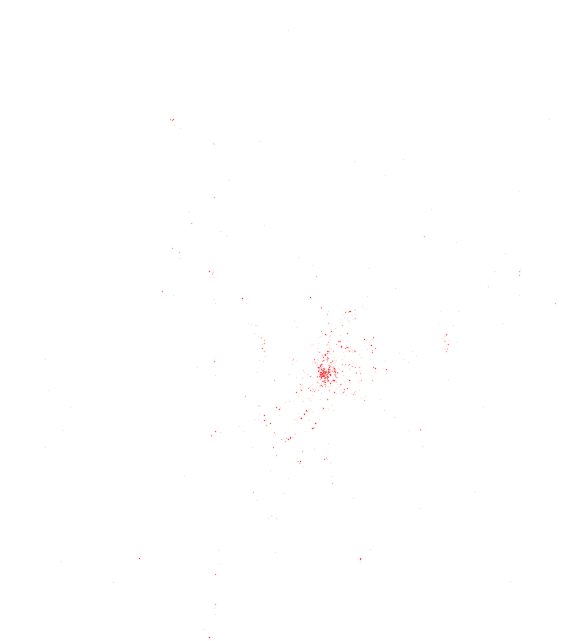

In [29]:
# Capa de tweets negativos
!python ficheros/Mapas/heatmap.py \
-p ficheros/Mapas/tweets_with_polarity_negative_svc \
-W 1000 \
-o ficheros/Mapas/madrid_tweets_polarity_negative_svc.png \
-G ficheros/Mapas/red.png \
--decay 0.5  -v -r 2 \
--osm \
--osm_base=http://a.basemaps.cartocdn.com/light_all/ --layer \
-e 39.865278,-4.585707,41.192925,-3.036635 

Image('ficheros/Mapas/madrid_tweets_polarity_negative_svc.png')

In [30]:
# Capa de tweets positivos
!python ficheros/Mapas/heatmap.py \
-p ficheros/Mapas/tweets_with_polarity_positive_svc \
-W 1000 \
-o ficheros/Mapas/madrid_tweets_polarity_layered_svc.png \
-G ficheros/Mapas/green.png \
--osm \
--osm_base=http://a.basemaps.cartocdn.com/light_all/ \
--decay 0.5  -v -r 2 \
-e 39.865278,-4.585707,41.192925,-3.036635 

Image('ficheros/Mapas/madrid_tweets_polarity_layered_svc.png')

Retrieving 12 tiles...
... done.


      69 ms  // scale: 0.000146 meters/pixel (763549741.511111 pixels/degree)
      70 ms  // Choosing OSM zoom level 9
      70 ms  // scale: 305.748113 meters/pixel (364.088889 pixels/degree)
     126 ms  // input extent: 39.85684488457764,-4.596693328125,41.201191648586104,-3.025648671875
     126 ms  // output extent: -16490.904162607523,-1673.6049664000002,-15846.904411854692,-1101.6050631111111
     126 ms  // creating an appending matrix
     126 ms  // processing data
     126 ms  // reading points from ficheros/Mapas/tweets_with_polarity_positive_svc
    1797 ms  // read 24023 points
    1797 ms  // combining coincident points
    1944 ms  // saving image (569 x 641)
    2064 ms  // end


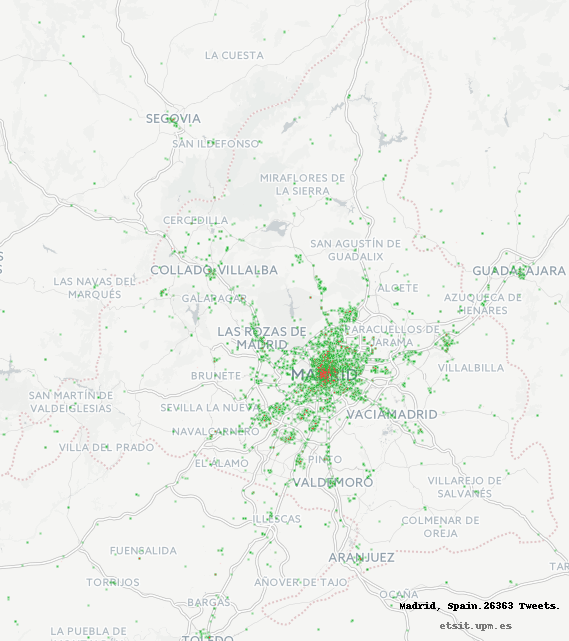

In [5]:
background = PIL.Image.open('ficheros/Mapas/madrid_tweets_polarity_layered_svc.png')
foreground = PIL.Image.open('ficheros/Mapas/madrid_tweets_polarity_negative_svc.png')

background.paste(foreground, (0, 0), foreground)

draw = ImageDraw.Draw(background)

background.save('ficheros/Mapas/madrid_tweets_polarity_svc.png')
background


from PIL import Image
# Obtenemos la imagen
im = PIL.Image.open('ficheros/Mapas/madrid_tweets_polarity_svc.png').convert('RGBA')
#H acemos una imagen en blanco para el texto, inicializado a color de texto transparente
txt = Image.new('RGBA', im.size, (255,255,255,0))
# Obtenemos un contexto de dibujo para el texto
d = ImageDraw.Draw(txt)
# Ponemos texto con color negro
d.text((400,600), "Madrid, Spain.26363 Tweets.", fill=(0,0,0,255))
# Ponemos texto con opacidad media
d.text((440,620), "etsit.upm.es", fill=(0,0,0,128))

out = Image.alpha_composite(im, txt)
out

<hr>

## Licencia

El notebook está licenciado libremente bajo la licencia [Creative Commons Attribution Share-Alike](https://creativecommons.org/licenses/by/2.0/).

La base del código empleado procede del trabajo de Manuel Garrido llamado [Dibujando 100k tweets de mi ciudad](http://pybonacci.org/2015/11/16/dibujando-100k-tweets-de-mi-ciudad/).

© 2017 - Juan Bermudo Mera, Margarita Bolívar Jiménez, Lourdes Fernández Nieto, Ramón Pérez Hernández.

Universidad Politécnica de Madrid.